In [51]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

from lamp import *
from lamp.models import *
from lamp.utils import *

## Linear Regression

In [52]:
a = round(rd.random() * 100, 2)
sigma = a / 2

xtrain = np.linspace(0, 2, 100).reshape(-1, 1)
ytrain = xtrain * a + np.random.uniform(-sigma, sigma, (100,1))

In [53]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain, nb_iter=1000, gradient_step=1e-5)

coef: 27.22
predicted: 28.27


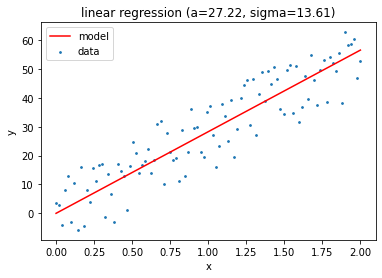

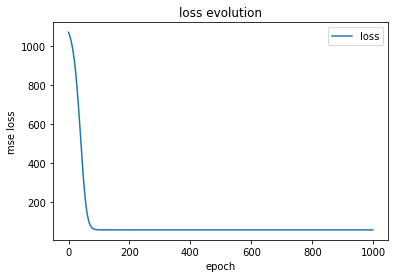

In [54]:
ahat = round(linreg.net._parameters[0][0], 2)
print(f"coef: {a}\npredicted: {ahat}")

plt.figure()
plt.title(f"linear regression (a={a}, sigma={sigma})")
plt.scatter(xtrain, ytrain, s=3, label="data")
plt.plot(xtrain, ahat * xtrain, color='red', label="model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("plots/linear_regression/linreg.png")

plt.figure()
plt.title("loss evolution")
plt.plot(linreg.loss_list, label="loss")
plt.xlabel("epoch")
plt.ylabel("mse loss")
plt.legend()
plt.savefig("plots/linear_regression/linreg_loss.png")

plt.show()

## Non-Linear

In [55]:
datax, datay = gen_arti(data_type=1)
datay = np.where(datay == -1, 0, 1)
print(f"batch : {datax.shape[0]}")

batch : 1000


score: 0.999


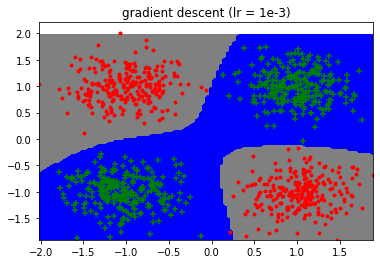

In [56]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden=20, nb_iter=1000, gradient_step=1e-3)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.title(f"gradient descent (lr = 1e-3)")
plt.savefig(f"plots/non_linear/nonlin_gd.png")
plt.show()

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


score: 0.997


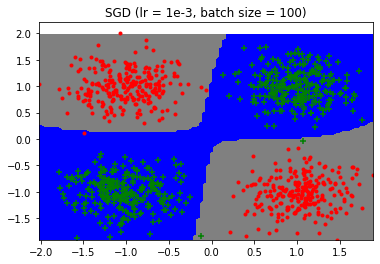

In [57]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden=20, nb_iter=2000, gradient_step=1e-3, batch_size=100)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.title(f"SGD (lr = 1e-3, batch size = 100)")
plt.savefig(f"plots/non_linear/nonlin_sgd.png")
plt.show()

## Multi class

In [58]:
(train_X, train_y), (test_X, test_y) = load_mnist()
onehot = to_onehot(train_y)

In [59]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=100, nb_iter=100, gradient_step=1e-2)

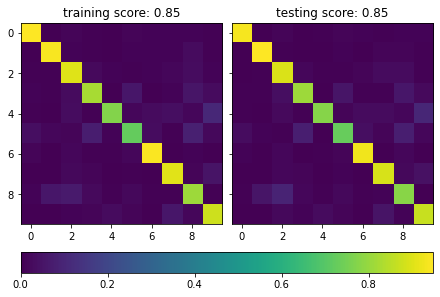

In [60]:
cms, scores = compare_mc_perf(mc, train_X, train_y, test_X, test_y)
plot_perf(cms, scores, "confusion_matrix.png")
plt.savefig("plots/classifier/confusion_matrix_100.png")

In [62]:
mc300 = MultiClass()
mc300.fit(train_X, onehot, hidden=300, nb_iter=100, gradient_step=1e-2)

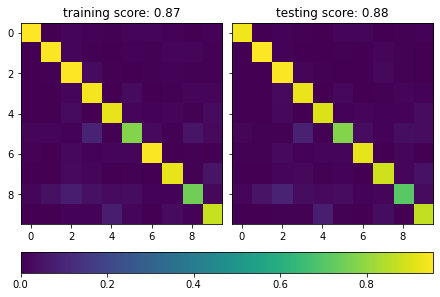

In [63]:
cms300, scores300 = compare_mc_perf(mc300, train_X, train_y, test_X, test_y)
plot_perf(cms300, scores300, "confusion_matrix300.png")
plt.savefig("plots/classifier/confusion_matrix_300.png")

In [ ]:
mc_batch = MultiClass()
mc_batch.fit(train_X, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

early stopping activated


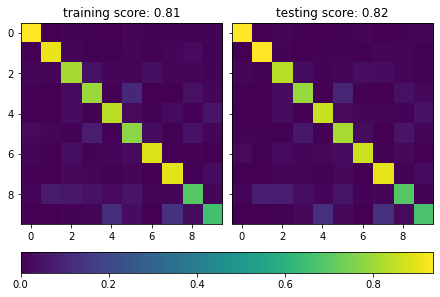

In [ ]:
cms_batch, scores_batch = compare_mc_perf(mc_batch, train_X, train_y, test_X, test_y)
plot_perf(cms_batch, scores_batch, "confusion_matrix_batch.png")
plt.savefig("plots/classifier/confusion_matrix_b100.png")

In [ ]:
mc_batch300 = MultiClass()
mc_batch300.fit(train_X, onehot, hidden=300, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

early stopping activated


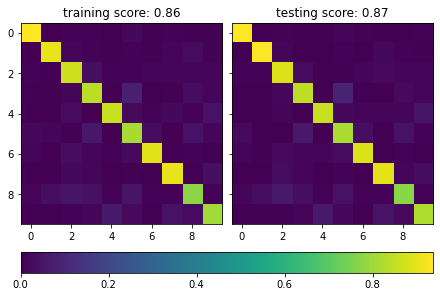

In [ ]:
cms_batch300, scores_batch300 = compare_mc_perf(mc_batch300, train_X, train_y, test_X, test_y)
plot_perf(cms_batch300, scores_batch300, "confusion_matrix_batch300.png")
plt.savefig("plots/classifier/confusion_matrix_b300.png")

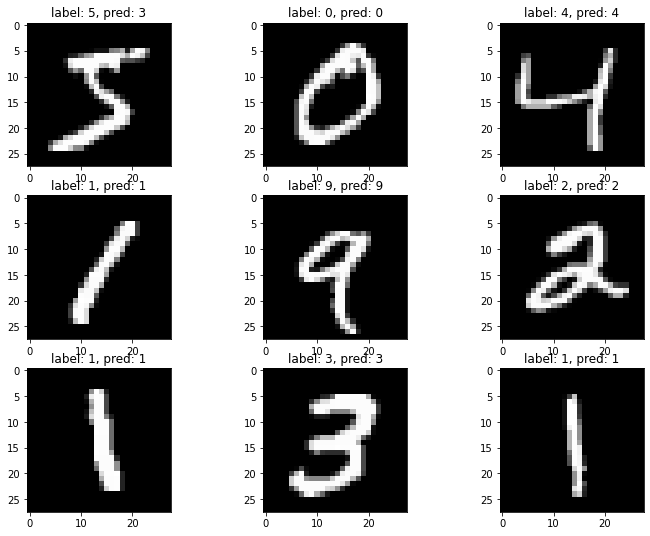

In [ ]:
pred_y = mc_batch300.predict(train_X)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(330 + 1 + i)
    show_mnist(train_X[i])
    plt.title(f"label: {train_y[i]}, pred: {pred_y[i]}")

plt.savefig("plots/classifier/example_pred")
plt.show()

## MLP

In [84]:
def analyse_compression(model, datax, datay, dtype="mnist", title="", classes=range(10)):
    decoded = model.predict(datax)
    nb_classes = len(classes)

    show = show_mnist if dtype == "mnist" else show_usps

    examples = np.zeros(nb_classes, dtype=np.int64)
    for i, v in enumerate(classes):
        examples[i] = np.where(datay == v)[0][0]

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2, nb_classes, i + 1)
        show(datax[x])
        plt.subplot(2, nb_classes, i + nb_classes + 1)
        show(decoded[x])

    plt.title(title)
    plt.show()

In [85]:
(train_X, train_y), (test_X, test_y) = load_mnist()
onehot = to_onehot(train_y)

train_X.shape

(60000, 784)

In [86]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=256, nb_iter=2000, gradient_step=1e-2, batch_size=1000, early_stop=1e-6)

print(f"Training classification score : {mc.score(train_X, train_y)}")
print(f"Testing classification score : {mc.score(test_X, test_y)}")

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training classification score : 0.8915666666666666
Testing classification score : 0.8971


### Auto-encoder

In [89]:
aebig = AutoEncoder()
aebig.fit(train_X, train_X, hidden=[512, 256], latent=10, nb_iter=3000, gradient_step=1e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


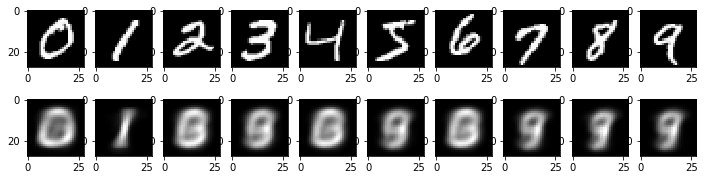

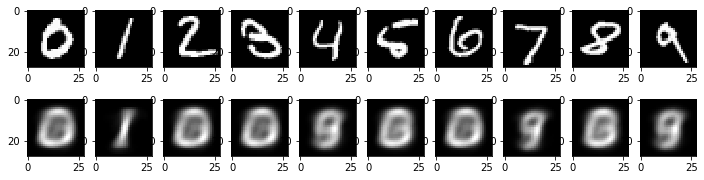

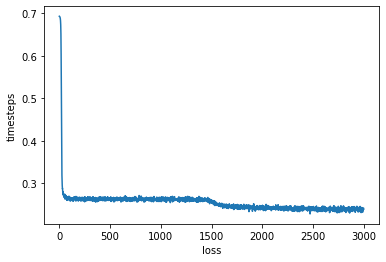

0.2667833333333333
0.2717


In [90]:
analyse_compression(aebig, train_X, train_y, dtype="mnist")
analyse_compression(aebig, test_X, test_y, dtype="mnist")

plot_loss(aebig.train_losses)

print(mc.score(aebig.predict(train_X), train_y))
print(mc.score(aebig.predict(test_X), test_y))

In [ ]:
ae10 = AutoEncoder()
ae10.fit(train_X, train_X, hidden=[256], latent=10, nb_iter=3000, gradient_step=2e-4, batch_size=500, early_stop=None)

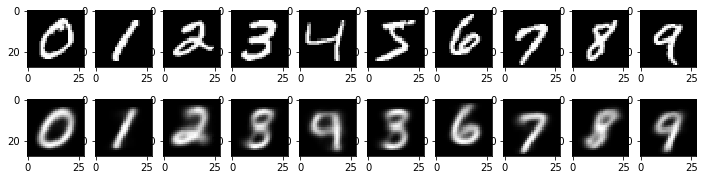

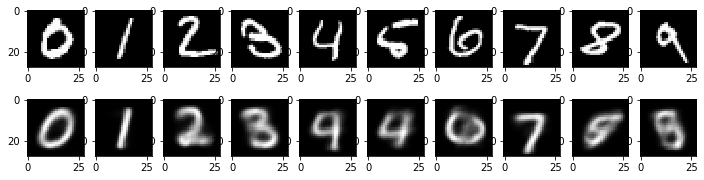

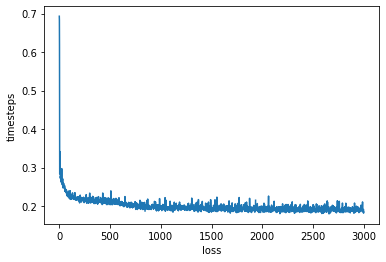

0.67295
0.6714


In [ ]:
analyse_compression(ae10, train_X, train_y, dtype="mnist")
analyse_compression(ae10, test_X, test_y, dtype="mnist")

plot_loss(ae10.train_losses)

print(mc.score(ae10.predict(train_X), train_y))
print(mc.score(ae10.predict(test_X), test_y))

In [ ]:
ae28 = AutoEncoder()
ae28.fit(train_X, train_X, hidden=[256], latent=28, nb_iter=3000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


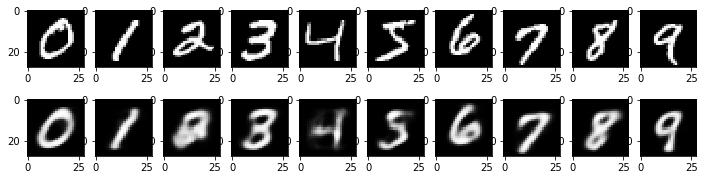

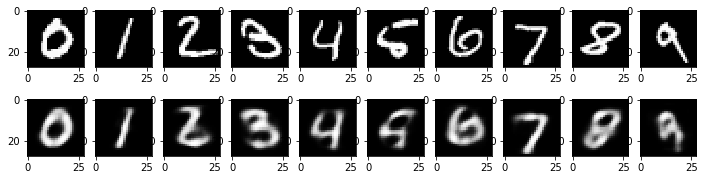

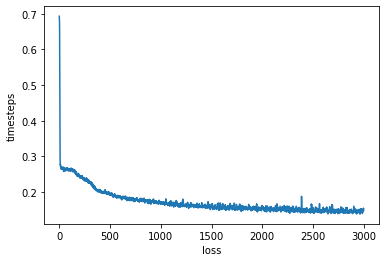

0.8373
0.8431


In [ ]:
analyse_compression(ae28, train_X, train_y, dtype="mnist")
analyse_compression(ae28, test_X, test_y, dtype="mnist")

plot_loss(ae28.train_losses)

print(mc.score(ae28.predict(train_X), train_y))
print(mc.score(ae28.predict(test_X), test_y))

In [ ]:
ae128 = AutoEncoder()
ae128.fit(train_X, train_X, hidden=[256], latent=128, nb_iter=3000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


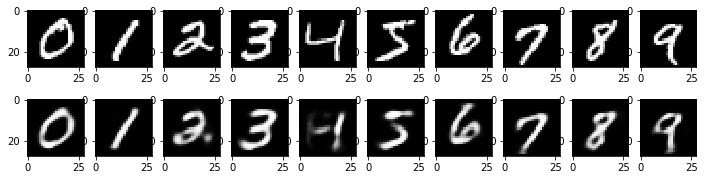

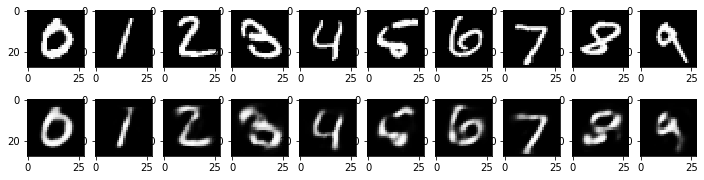

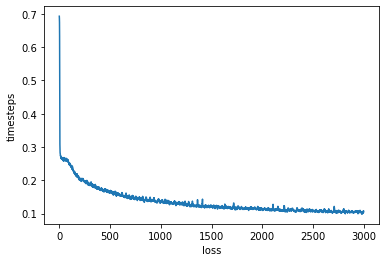

0.8727333333333334
0.8838


In [ ]:
analyse_compression(ae128, train_X, train_y, dtype="mnist")
analyse_compression(ae128, test_X, test_y, dtype="mnist")

plot_loss(ae128.train_losses)

print(mc.score(ae128.predict(train_X), train_y))
print(mc.score(ae128.predict(test_X), test_y))

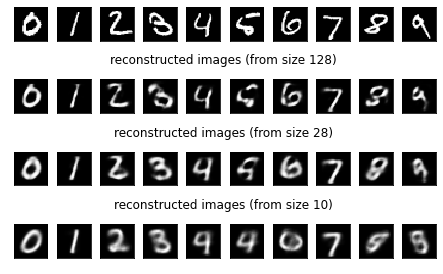

In [ ]:
datax, datay = test_X, test_y
decoded128 = ae128.predict(datax)
decoded28 = ae28.predict(datax)
decoded10 = ae10.predict(datax)

rd = "reconstructed images (from size"
titles = ["original images", rd + " 128)", rd + " 28)", rd + " 10)"]
datas = [datax, decoded128, decoded28, decoded10]

examples = [np.where(datay == i)[0][0] for i in range(10)]

fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(4, 1)

for subfig, title, data in zip(subfigs.flat, titles, datas):
    subfig.suptitle(title)
    axs = subfig.subplots(1, 10)
    for i, (ax, x) in enumerate(list(zip(axs.flat, examples))):
        ax.imshow(data[x].reshape(28, 28), interpolation="nearest", cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig("plots/autoencoder/reconstruted_images.png")
plt.show()

### Denoiser

In [ ]:
noise_amount = 0.25
train_Xnoised25 = noise_data(train_X, noise_amount)
test_Xnoised25 = noise_data(test_X, noise_amount)

ae_noise25 = AutoEncoder()
ae_noise25.fit(train_Xnoised25, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


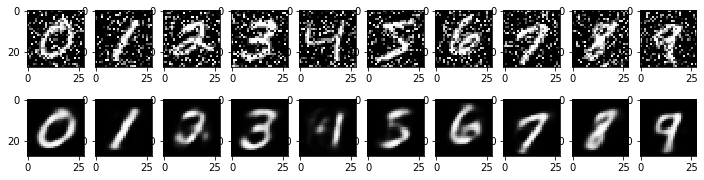

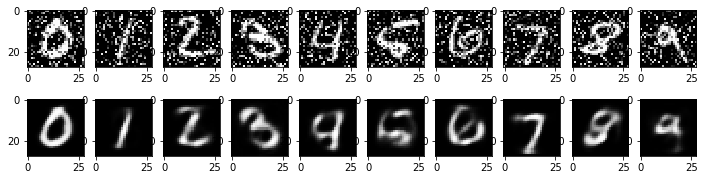

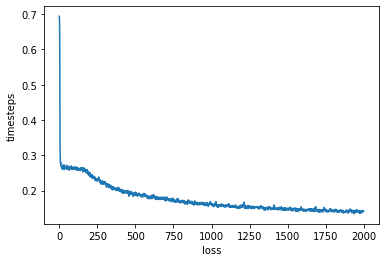

0.8593
0.8696


In [ ]:
analyse_compression(ae_noise25, train_Xnoised25, train_y, dtype="mnist")
analyse_compression(ae_noise25, test_Xnoised25, test_y, dtype="mnist")

plot_loss(ae_noise25.train_losses)

print(mc.score(ae_noise25.predict(train_X), train_y))
print(mc.score(ae_noise25.predict(test_X), test_y))

In [ ]:
noise_amount = 0.5
train_Xnoised50 = noise_data(train_X, noise_amount)
test_Xnoised50 = noise_data(test_X, noise_amount)

ae_noise50 = AutoEncoder()
ae_noise50.fit(train_Xnoised50, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


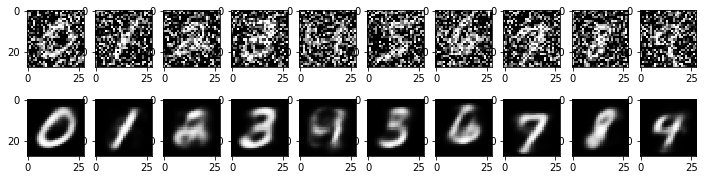

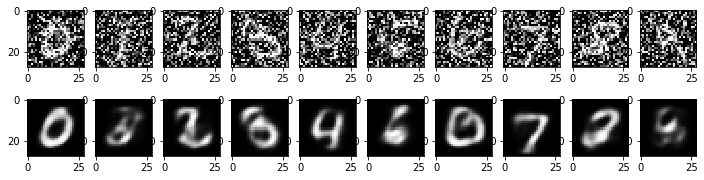

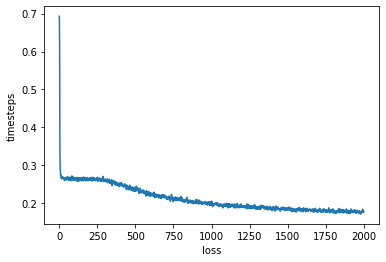

0.7984333333333333
0.8101


In [ ]:
analyse_compression(ae_noise50, train_Xnoised50, train_y, dtype="mnist")
analyse_compression(ae_noise50, test_Xnoised50, test_y, dtype="mnist")

plot_loss(ae_noise50.train_losses)

print(mc.score(ae_noise50.predict(train_X), train_y))
print(mc.score(ae_noise50.predict(test_X), test_y))

In [ ]:
noise_amount = 0.75
train_Xnoised75 = noise_data(train_X, noise_amount)
test_Xnoised75 = noise_data(test_X, noise_amount)

ae_noise75 = AutoEncoder()
ae_noise75.fit(train_Xnoised75, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


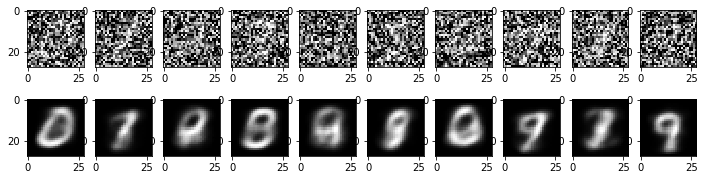

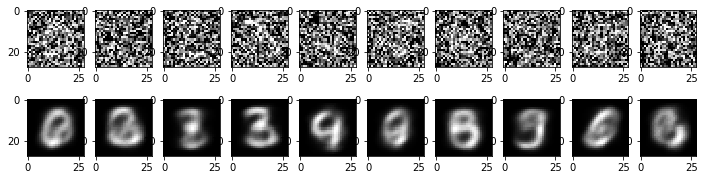

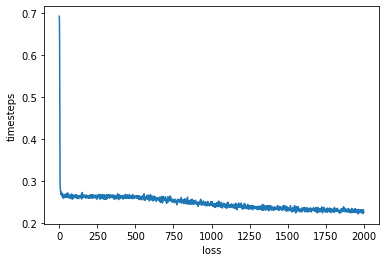

0.69565
0.703


In [ ]:
analyse_compression(ae_noise75, train_Xnoised75, train_y, dtype="mnist")
analyse_compression(ae_noise75, test_Xnoised75, test_y, dtype="mnist")

plot_loss(ae_noise75.train_losses)

print(mc.score(ae_noise75.predict(train_X), train_y))
print(mc.score(ae_noise75.predict(test_X), test_y))

In [ ]:
datax, datay = test_X, test_y
decoded25 = ae_noise25.predict(test_Xnoised25)
decoded50 = ae_noise50.predict(test_Xnoised50)
decoded75 = ae_noise75.predict(test_Xnoised75)

In [ ]:
def plot_denoiser(noised_X, denoised, title=""):
    plt.figure(figsize=(4, 3))
    for i in range(3):
        plt.subplot(230 + 1 + i)
        show_mnist(noised_X[i])
        plt.subplot(230 + 4 + i)
        show_mnist(denoised[i])

    plt.savefig(title)
    plt.show()

### USPS

In [64]:
train_X, train_y = load_usps("../data/USPS_train.txt")
test_X, test_y = load_usps("../data/USPS_test.txt")
onehot = to_onehot(train_y)

In [65]:
mc_usps = MultiClass()
mc_usps.fit(train_X, onehot, hidden=128, nb_iter=1000, gradient_step=1e-2, batch_size=500, early_stop=1e-4)

print(f"Training classification score : {mc_usps.score(train_X, train_y)}")
print(f"Testing classification score : {mc_usps.score(test_X, test_y)}")

early stopping activated
Training classification score : 0.9145521876285831
Testing classification score : 0.8709516691579472


In [68]:
ae_usps_bce = AutoEncoder()
ae_usps_bce.fit(train_X, train_X, hidden=[100], latent=10, nb_iter=4000, gradient_step=1e-4, batch_size=730, early_stop=5e-6)

early stopping activated


In [70]:
usps_decoded = ae_usps_bce.predict(test_X)

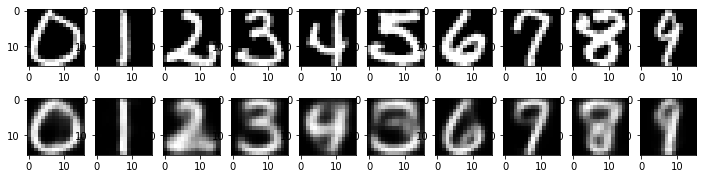

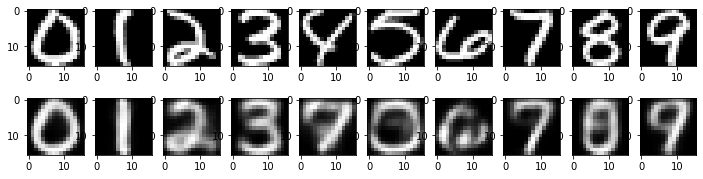

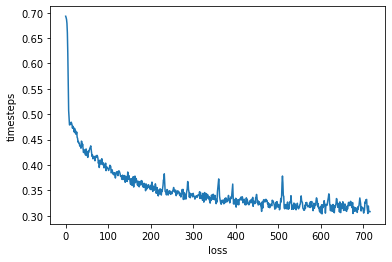

0.7599780551364697
0.7299451918285998


In [71]:
analyse_compression(ae_usps_bce, train_X, train_y, dtype="usps")
analyse_compression(ae_usps_bce, test_X, test_y, dtype="usps")

plot_loss(ae_usps_bce.train_losses)

print(mc_usps.score(ae_usps_bce.predict(train_X), train_y))
print(mc_usps.score(ae_usps_bce.predict(test_X), test_y))

In [72]:
ae_usps_mse = AutoEncoder(loss=MSELoss())
ae_usps_mse.fit(train_X, train_X, hidden=[100], latent=10, nb_iter=4000, gradient_step=1e-4, batch_size=730, early_stop=5e-6)

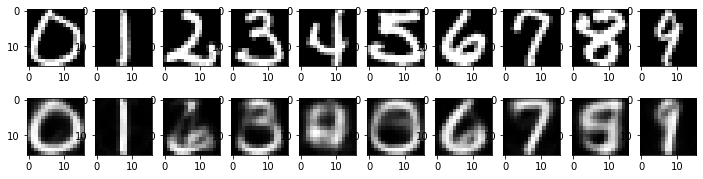

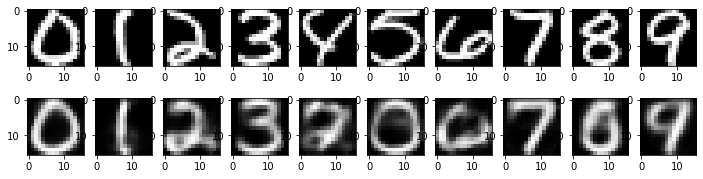

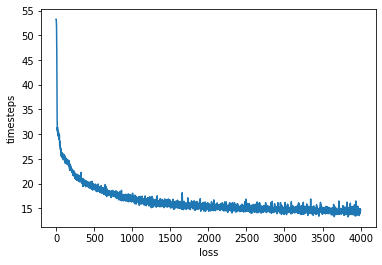

0.7898779316966122
0.7553562531141006


In [73]:
analyse_compression(ae_usps_mse, train_X, train_y, dtype="usps")
analyse_compression(ae_usps_mse, test_X, test_y, dtype="usps")

plot_loss(ae_usps_mse.train_losses)

print(mc_usps.score(ae_usps_mse.predict(train_X), train_y))
print(mc_usps.score(ae_usps_mse.predict(test_X), test_y))

In [74]:
noise_amount = 0.3
train_Xnoised = noise_data(train_X, noise_amount)
test_Xnoised = noise_data(test_X, noise_amount)

ae_usps_noise = AutoEncoder()
ae_usps_noise.fit(train_Xnoised, train_X, hidden=[100], latent=10, nb_iter=4000, gradient_step=1e-4, batch_size=730, early_stop=1e-6)

early stopping activated


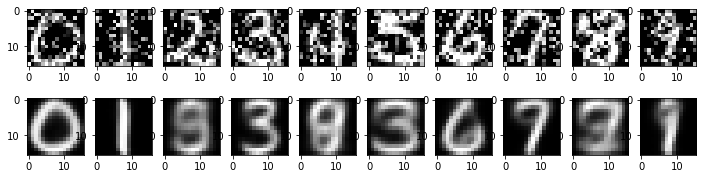

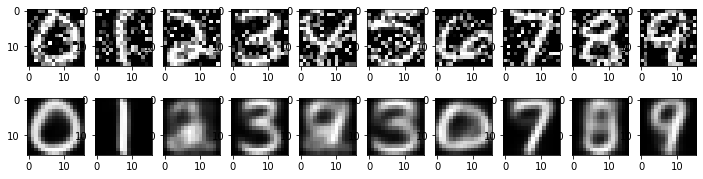

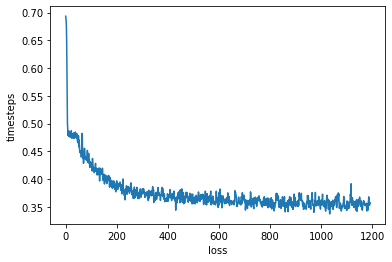

0.6387326841311206
0.6078724464374688


In [75]:
analyse_compression(ae_usps_noise, train_Xnoised, train_y, dtype="usps")
analyse_compression(ae_usps_noise, test_Xnoised, test_y, dtype="usps")

plot_loss(ae_usps_noise.train_losses)

print(mc_usps.score(ae_usps_noise.predict(train_X), train_y))
print(mc_usps.score(ae_usps_noise.predict(test_X), test_y))

### t-SNE projection

In [76]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def tsne(datax, perplexities):
    tsnes = [
        TSNE(
            n_components=2,
            init="random",
            random_state=0,
            perplexity=perplexity,
            learning_rate="auto",
            n_iter=300,
        )
        for perplexity in perplexities
    ]
    return [tsne.fit_transform(datax) for tsne in tsnes]


def plot_tsne(embedded_datas, pred, perplexities):
    fig = plt.figure(figsize=(16, 4), constrained_layout=True)

    axes = fig.subplots(nrows=1, ncols=4, sharey=True)
    for i, ax in enumerate(axes):
        im = ax.scatter(embedded_datas[i][:, 0], embedded_datas[i][:, 1], c=pred)
        ax.set_title(f"Perplexity {perplexities[i]}")

    fig.colorbar(im, ax=axes, location="right")
    plt.show()

In [81]:
perplexities = [5, 30, 50, 86]

kmeans = KMeans(
    n_clusters=10,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=0,
)

init_pred = kmeans.fit_predict(test_X)
deco_pred = kmeans.fit_predict(usps_decoded)

In [82]:
embedded_init = tsne(test_X, perplexities=perplexities)
embedded_deco = tsne(usps_decoded, perplexities=perplexities)

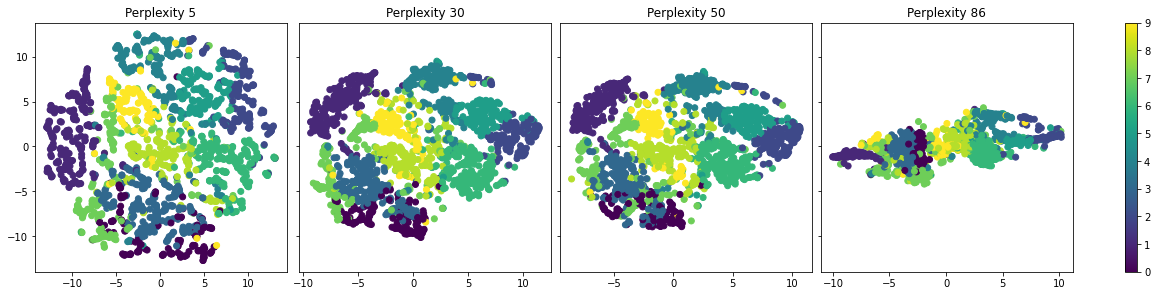

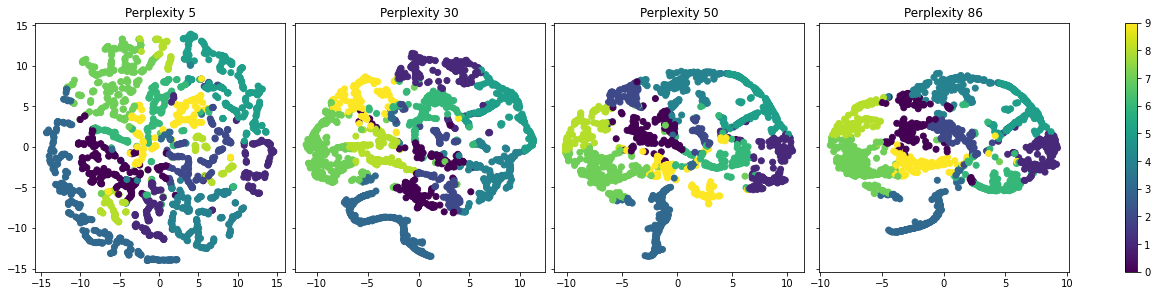

In [83]:
plot_tsne(embedded_init, init_pred, perplexities)
plot_tsne(embedded_deco, deco_pred, perplexities)

## Convolution